In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('SM1_data.csv')

data=data.set_index('Date')
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

In [4]:
train = data.loc[data.index <'2017-01-01']
test = data.loc[(data.index >= '2017-01-01') & (data.index < '2021-01-01')]


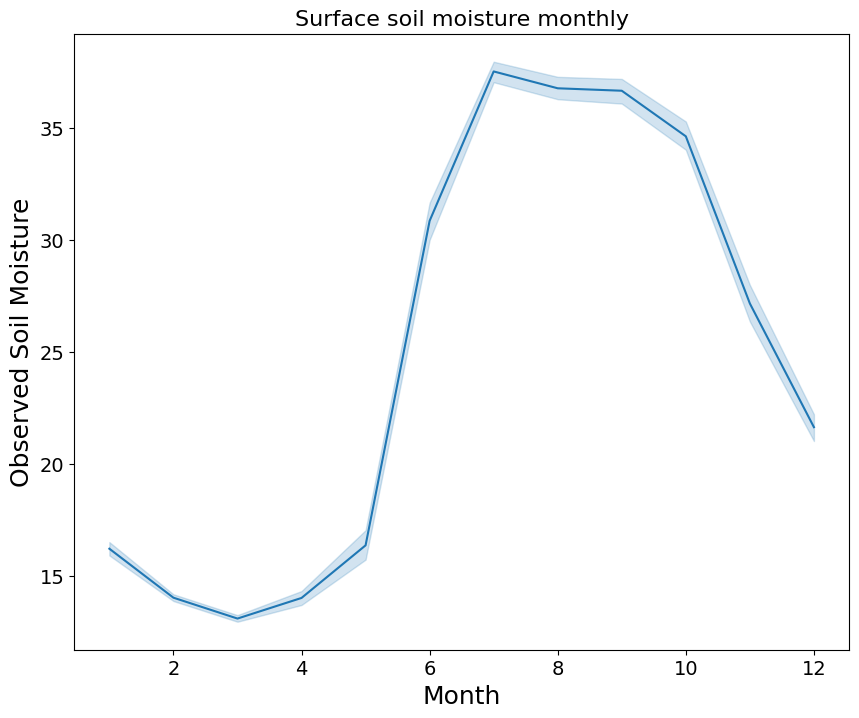

In [5]:
def create_features(data):
    #this will create ts features on time series index
    data=data.copy()
    data['Month']=data.index.month
    data['quarter']=data.index.quarter
    data['dayofyear']=data.index.day_of_year
    data['year']=data.index.year
    data['daysofweek']=data.index.day_of_week
    return data

plt.rc('font', size=14)          
plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=18)     
plt.rc('xtick', labelsize=14)    
plt.rc('ytick', labelsize=14)    
plt.rc('legend', fontsize=14)    
plt.rc('figure', titlesize=18)

data=create_features(test)
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data,x='Month',y='SM10')
plt.ylabel('Observed Soil Moisture')
ax.set_title('Surface soil moisture monthly')
plt.show()

In [6]:


X_train = train[['St10', 'Rain', 'Air_Temperature','ref40']]
Y_train = train[['SM10']]

X_test = test[['St10', 'Rain', 'Air_Temperature','ref40']]
Y_test = test[['SM10']]


model = RandomForestRegressor(max_depth=7, random_state=42)
model.fit(X_train, Y_train)

SMP = model.predict(X_test)

SMP_series = pd.Series(SMP.flatten(), index=test.index)



C:\Users\Saurabh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


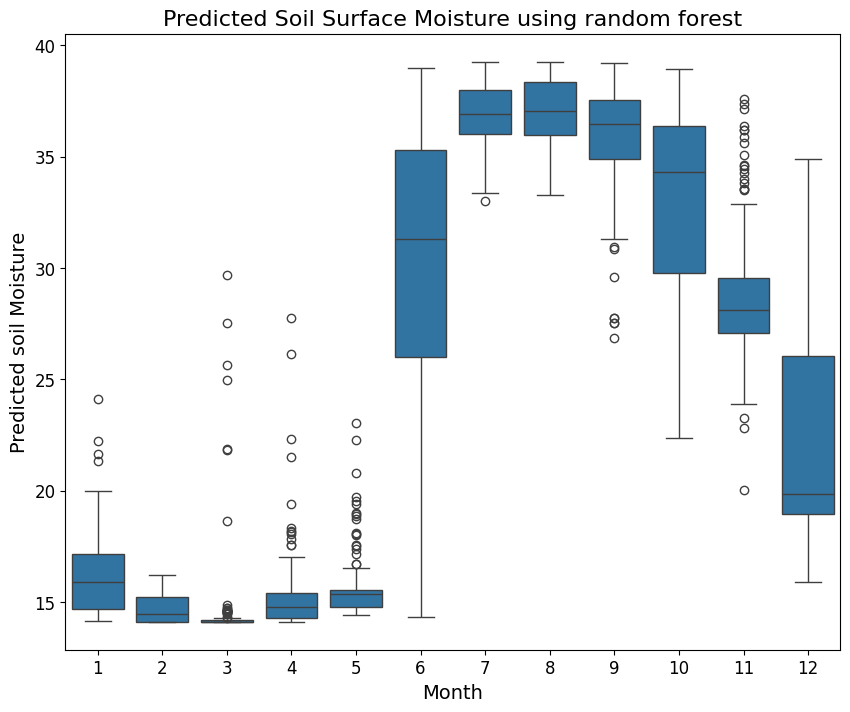

In [7]:
SMP_df = pd.DataFrame(SMP, index=test.index, columns=['SM10']) 
PSM = SMP_df.loc[(SMP_df.index >= '2017-01-01') & (SMP_df.index < '2021-01-01')]
data = create_features(PSM)
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the y tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=18)

fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data,x='Month',y='SM10')
ax.set_title('Predicted Soil Surface Moisture using random forest')
plt.ylabel('Predicted soil Moisture')
plt.show()